In [1]:
import hdr
from hdr import *
import skimage
from skimage import io
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
imagelist = []
i_s = ["04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16"]

for i in i_s:
    imagelist.append(cv.imread(f"HDR inputs/desktop/DSC_01{i}.png"))

print("Quantity of images: ", len(imagelist))

Quantity of images:  13


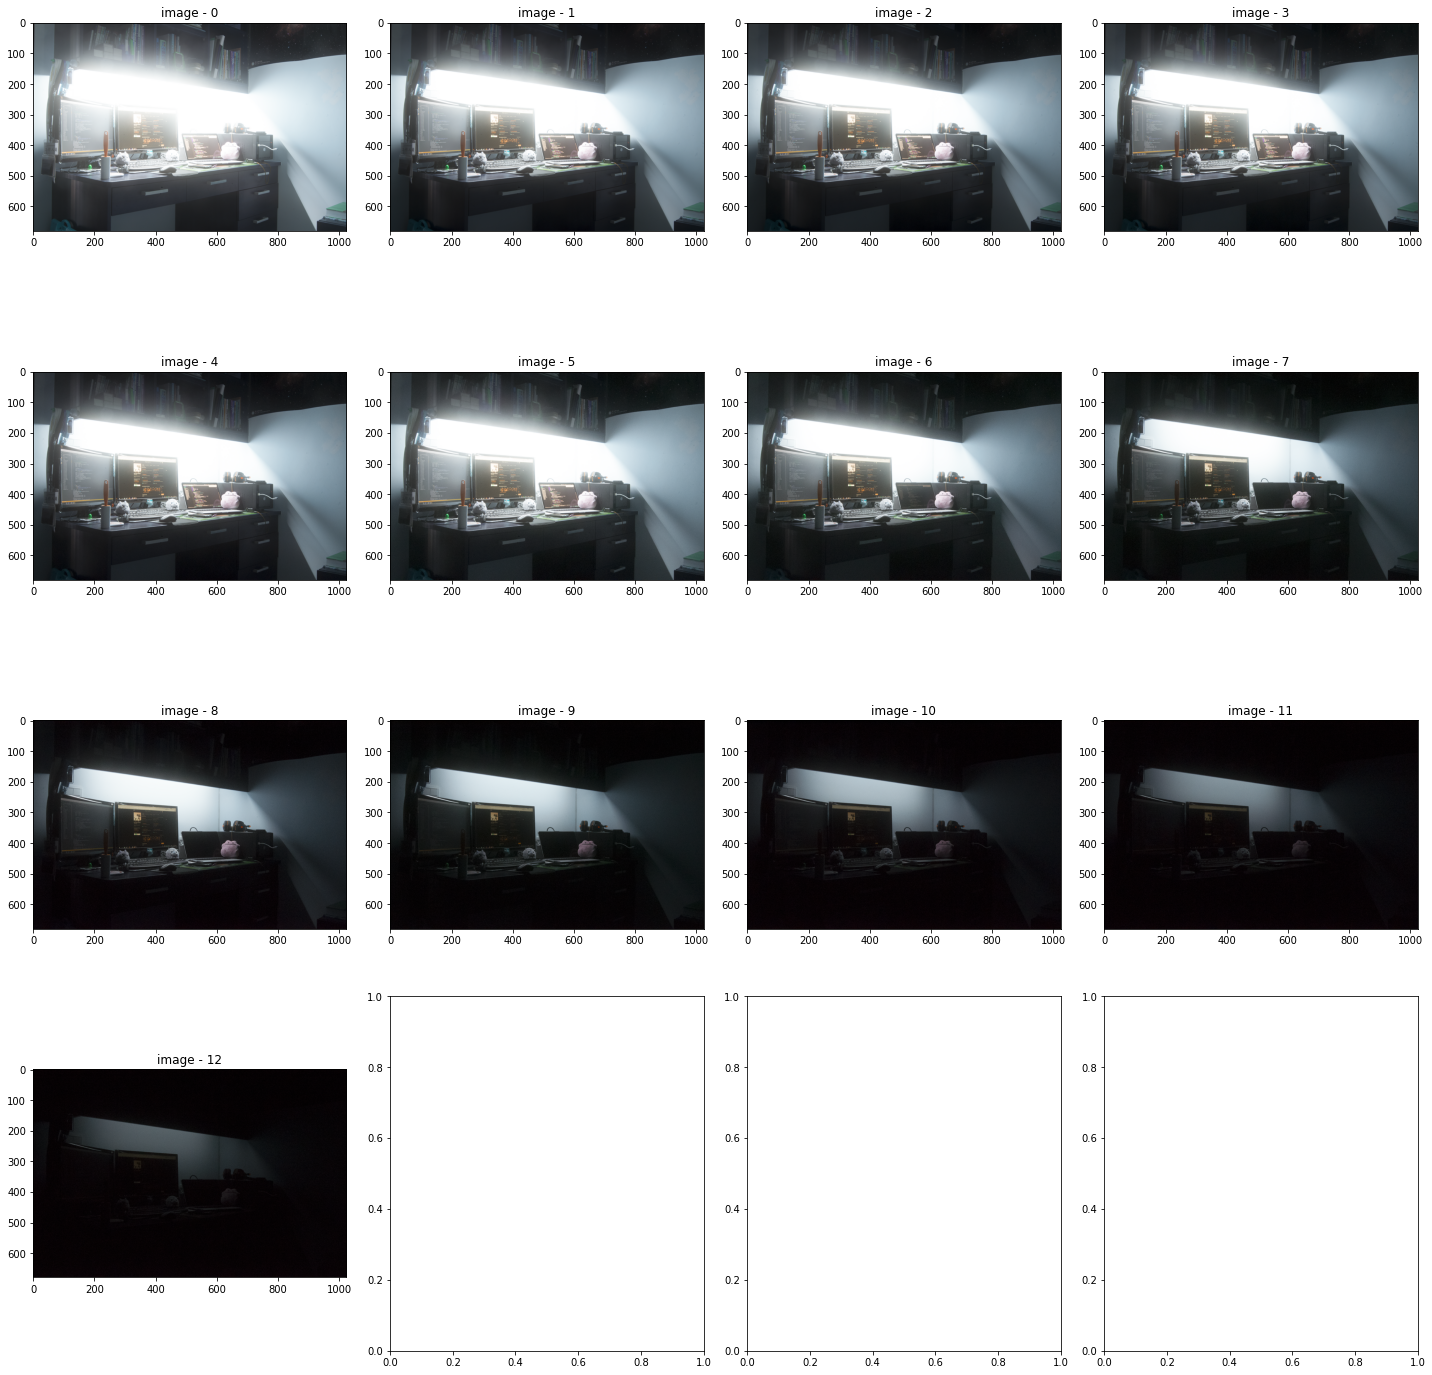

In [3]:
#Ploting Images List
fig, axes = plt.subplots(4,4, figsize=(20, 20))
ax = axes.ravel()
i = 0
while i < len(imagelist):
    ax[i].imshow(imagelist[i])
    ax[i].set_title(f"image - {i}")
    i+=1

fig.tight_layout()
plt.show() 

In [4]:
#Read Exposures and insert into a numpy array
txt = pd.read_csv("HDR inputs/desktop/image_list.txt",sep="\t",header=None)
numpy = txt[1].to_numpy()
a = len(numpy)
explist = numpy[1:a].astype(float)

In [5]:
#Create the log exposure array
lnexp = np.log(explist)

In [6]:
#Compute HDR

output = computeHDR(imagelist, lnexp, smoothing_lambda=100., gamma=0.6)

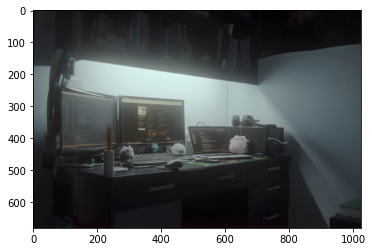

In [7]:
plt.imshow(output)

In [8]:
cv.imwrite("HDR inputs/desktop/output_hdr.png",output)

True